<a href="https://colab.research.google.com/github/vivekswamy021/House-rent-prediction-/blob/main/House_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**The rent of a housing property depends on a lot of factors like:**

1.number of bedrooms, hall, and kitchen

2.size of the property

3.the floor of the house

4.area type

5.area locality

6.City

7.furnishing status of the house

##**Importing Libraries**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from warnings import filterwarnings
filterwarnings("ignore")

##**Load the data**

In [45]:
from google .colab import files
uploaded = files.upload()

Saving House_Rent_Dataset.csv to House_Rent_Dataset (1).csv


In [46]:
df=pd.read_csv("House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


##**About the Columns present in Dataset**

- BHK : Number of Bedrooms, Hall, Kitchen.

- Rent: Rent of the Houses/Apartments/Flats.

- Size: Size of the Houses/Apartments/Flats in Square Feet.

- Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

- Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

- Area Locality: Locality of the Houses/Apartments/Flats.

- City: City where the Houses/Apartments/Flats are Located.

- Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

- Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

- Bathroom: Number of Bathrooms.

- Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


##**Data Cleaning**

In [48]:
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [49]:
# Drop unwanted columns
df.drop(['Posted On', 'Floor', 'Area Locality'], axis=1, inplace=True)

#because we are predicting House rent so we don't want these columns

**Numerical data** = ["BHK"] , ["Rent"] ,["Size"] ,["Bathroom"]

**Categorical columns** = ["Floor"] ,["Area Type"],["Area Locality"] ,["City"],["Furnishing Status"] ,["Tenant Preferred"],["Point of Contact"]

**Date and time** = ["Posted on"] should be convert

##**Statistical analysis**

In [50]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


##**Mean, Median, highest, and lowest rent of the houses**

In [51]:
print(f"Mean Rent: {df.Rent.mean()}")
print(f"Median Rent: {df.Rent.median()}")
print(f"Highest Rent: {df.Rent.max()}")
print(f"Lowest Rent: {df.Rent.min()}")

Mean Rent: 34993.45132743363
Median Rent: 16000.0
Highest Rent: 3500000
Lowest Rent: 1200


##**Data Visualization**

##**Rent of the houses in different cities according to the number of bedrooms, halls, and kitchens**

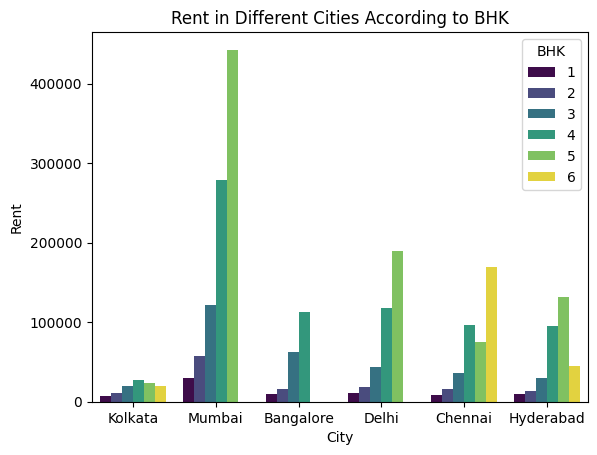

In [52]:
sns.barplot(data=df, x='City', y='Rent', hue='BHK',palette="viridis",ci=None)
plt.title("Rent in Different Cities According to BHK")
plt.xlabel("City")
plt.ylabel("Rent")

plt.show()

##**Rent of the houses in different cities according to the area type**

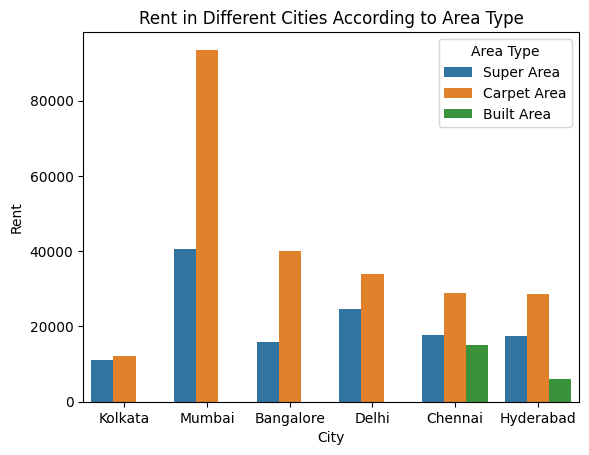

In [53]:
sns.barplot(data=df, x='City', y='Rent', hue='Area Type',ci=None)
plt.title("Rent in Different Cities According to Area Type")
plt.xlabel("City")
plt.ylabel("Rent")

plt.show()

In [54]:
df["Area Type"].value_counts()

,count
Area Type,
Super Area,2446
Carpet Area,2298
Built Area,2


##**Rent of the houses in different cities according to the furnishing status of the house**

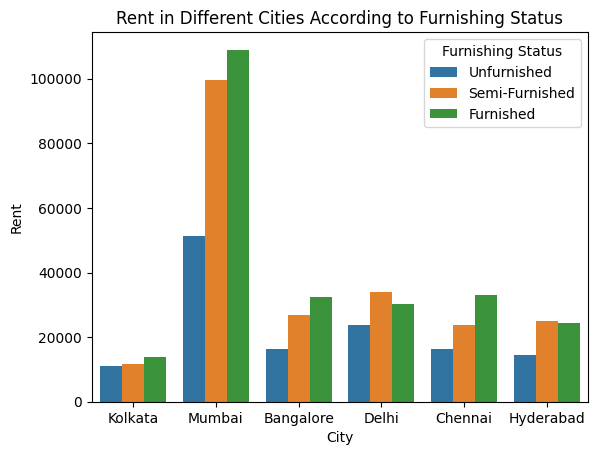

In [55]:
sns.barplot(data=df, x='City', y='Rent', hue='Furnishing Status',ci=None)
plt.title("Rent in Different Cities According to Furnishing Status")
plt.xlabel("City")
plt.ylabel("Rent")

plt.show()

##**Houses in different cities according to the size of the house**

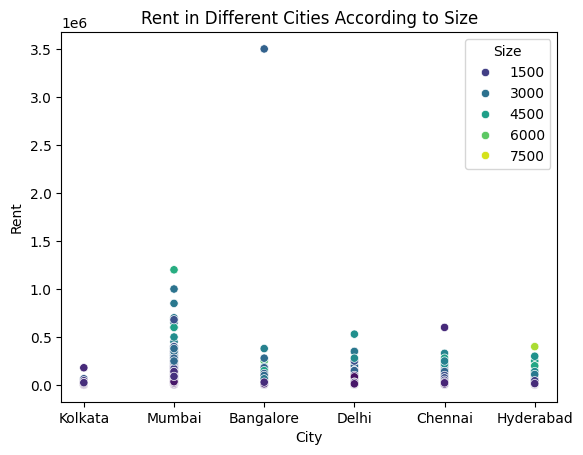

In [56]:
sns.scatterplot(data=df, x='City', y='Rent', hue='Size',palette="viridis")
plt.title("Rent in Different Cities According to Size")
plt.xlabel("City")
plt.ylabel("Rent")

plt.show()

In [57]:
df["Size"].value_counts()

,count
Size,
1000,240
600,225
800,220
1200,193
500,192
...,...
67,1
1156,1
2671,1


##**Number of houses available for rent in different cities according to the dataset**




In [58]:
total_houses = len(df)
print(f"Total number of houses available for rent: {total_houses}")

Total number of houses available for rent: 4746


In [59]:
#available houses for rent in different cities
houses_by_city = df["City"].value_counts()
print(houses_by_city)

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64


##**Number of Houses Available for Rent in Different Cities**

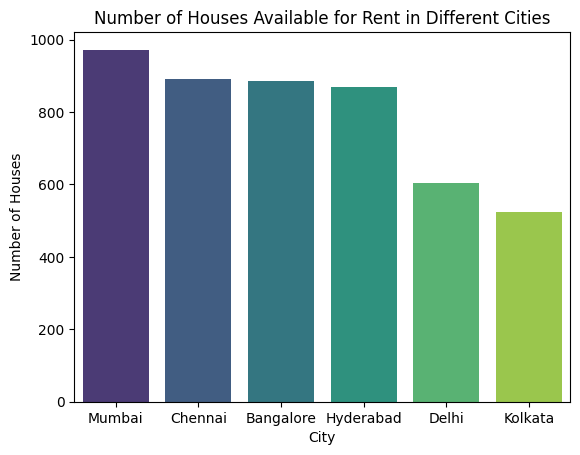

In [60]:
sns.countplot(x='City', data=df, order=houses_by_city.index, palette="viridis")
plt.title('Number of Houses Available for Rent in Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.show()

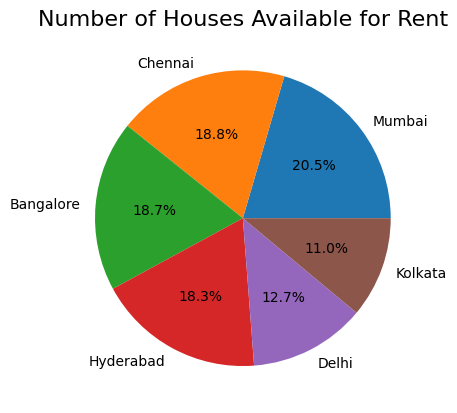

In [61]:
#percentage of no.of houses available for rent
plt.pie(x=df["City"].value_counts(), labels=df["City"].value_counts().index, autopct='%1.1f%%')
plt.title('Number of Houses Available for Rent', fontsize=16)
plt.show()

##  let’s have a look at the number of houses available for different types of tenants

In [62]:
df['Tenant Preferred'].value_counts()

,count
Tenant Preferred,
Bachelors/Family,3444
Bachelors,830
Family,472


In [63]:
len(df['Tenant Preferred'])

4746

##**Preference of Tenant in India**

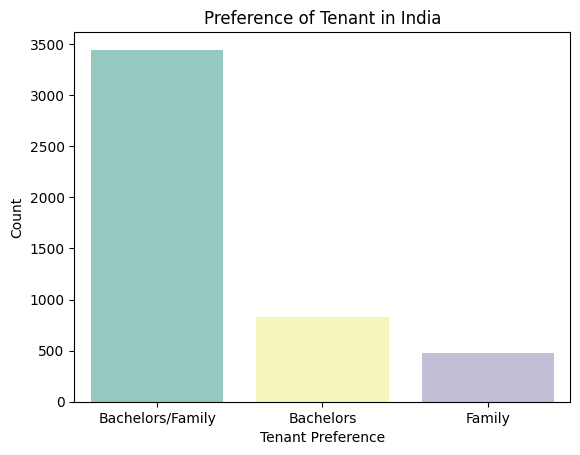

In [64]:
sns.countplot(x="Tenant Preferred", data=df, palette="Set3")
plt.title("Preference of Tenant in India")
plt.xlabel("Tenant Preference")
plt.ylabel("Count")
plt.show()

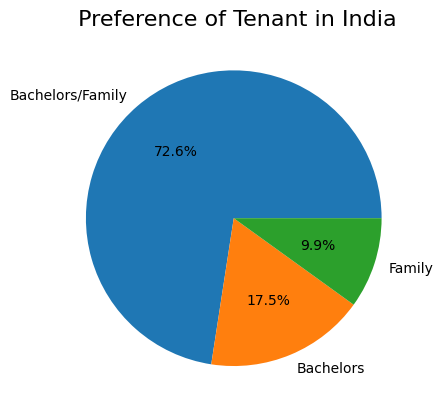

In [65]:
#Preference of Tenant in India
plt.pie(x=df["Tenant Preferred"].value_counts(), labels=df["Tenant Preferred"].value_counts().index, autopct='%1.1f%%')
plt.title(' Preference of Tenant in India', fontsize=16)
plt.show()

#**House Rent Prediction Model**

##**Encoding**

In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Area Type"] = label_encoder.fit_transform(df["Area Type"])
df["City"] = label_encoder.fit_transform(df["City"])
df["Furnishing Status"] = label_encoder.fit_transform(df["Furnishing Status"])
df["Tenant Preferred"] = label_encoder.fit_transform(df["Tenant Preferred"])
print(df.head())

   BHK   Rent  Size  Area Type  City  Furnishing Status  Tenant Preferred  \
0    2  10000  1100          2     4                  2                 1   
1    2  20000   800          2     4                  1                 1   
2    2  17000  1000          2     4                  1                 1   
3    2  10000   800          2     4                  2                 1   
4    2   7500   850          1     4                  2                 0   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner  


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   int64 
 4   City               4746 non-null   int64 
 5   Furnishing Status  4746 non-null   int64 
 6   Tenant Preferred   4746 non-null   int64 
 7   Bathroom           4746 non-null   int64 
 8   Point of Contact   4746 non-null   object
dtypes: int64(8), object(1)
memory usage: 333.8+ KB


##**Train test split**

In [68]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(df[["BHK", "Size", "Area Type", "City",
                   "Furnishing Status", "Tenant Preferred",
                   "Bathroom"]])
y = np.array(df[["Rent"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)

- splits the dataset into training and testing sets for machine learning. Here's a short explanation:

- x: Input features (like BHK, Size, City, etc.)

- y: Target variable (Rent)

- train_test_split: Splits x and y into training (90%) and testing (10%) sets.

- random_state = 42

#**let’s train a house rent prediction model using an LSTM neural network model**

In [69]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=21)

Epoch 1/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 9285151744.0000
Epoch 2/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 5537446400.0000
Epoch 3/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 4055227648.0000
Epoch 4/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 5725485056.0000
Epoch 5/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 3517255424.0000
Epoch 6/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 4953007104.0000
Epoch 7/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 6811714048.0000
Epoch 8/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 3407911424.0000
Epoch 9/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 5221976064.0000
Epoch 10/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 10701712384.0000
Epoch 11/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 3331178752.0000
Epoch 12/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 2598775808.0000
Epoch 13/21
4271/4271 ━━━━━━━━━━━━━━━━━━━━ 22s 5

##**Now predicting the rent of a housing property using the trained model**

In [71]:
import numpy as np
print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
print("\npincode = Mumbai: 4000, Chennai: 6000, Bangalore : 5600")
print("pincode = Hyderabad: 5000, Delhi: 1100, Kolkata: 7000\n")
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))


features = np.array([[a, b, c, d, e, f,g]])
print("Predicted House Price = ",model.predict(features))

Enter House Details to Predict Rent
Number of BHK: 3
Size of the House: 1000
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): 2

pincode = Mumbai: 4000, Chennai: 6000, Bangalore : 5600
pincode = Hyderabad: 5000, Delhi: 1100, Kolkata: 7000

Pin Code of the City: 6000
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): 2
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): 2
Number of bathrooms: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted House Price =  [[147621.27]]
